In [27]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# getting the data from UC Irving machine learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df = pd.read_csv(url)

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Category	Column Name	Description	Values
Administrative	Administrative	Number of administrative pages visited	Integer (e.g., 0, 3, 5)
Administrative_Duration	Time spent on administrative pages (seconds)	Float (e.g., 0.0, 45.3, 120.8)
Informational	Informational	Number of informational pages visited	Integer
Informational_Duration	Time spent on informational pages (seconds)	Float
Product-Related	ProductRelated	Number of product pages visited	Integer
ProductRelated_Duration	Time spent on product pages (seconds)	Float
User Engagement	BounceRates	Percentage of visitors who left immediately	Float (0–1)
ExitRates	Percentage of pageviews that were last in session	Float (0–1)
PageValues	Average value of pages viewed before purchase	Float (≥ 0)
Traffic Source	TrafficType	Source of traffic (20 categories)	Integer (1–20)
VisitorType	Type of visitor	'New_Visitor', 'Returning_Visitor', 'Other'
Weekend	Whether session occurred on weekend	Boolean (True/False)
Temporal	Month	Month of the year	Abbreviated (e.g., 'Feb', 'Nov')
SpecialDay	Proximity to special shopping day	Float (0–1, where 1 = day of event)
Target Variable	Revenue	Whether purchase occurred	Boolean (True/False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
df.shape

(12330, 18)

In [15]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
duplicates = df[df.duplicated()]
duplicates.shape
print(duplicates)

       Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0                      0.0              0   
456                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
158                       0.0               1                      0.0   
159                       0.0               1                      0.0 

In [20]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [22]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

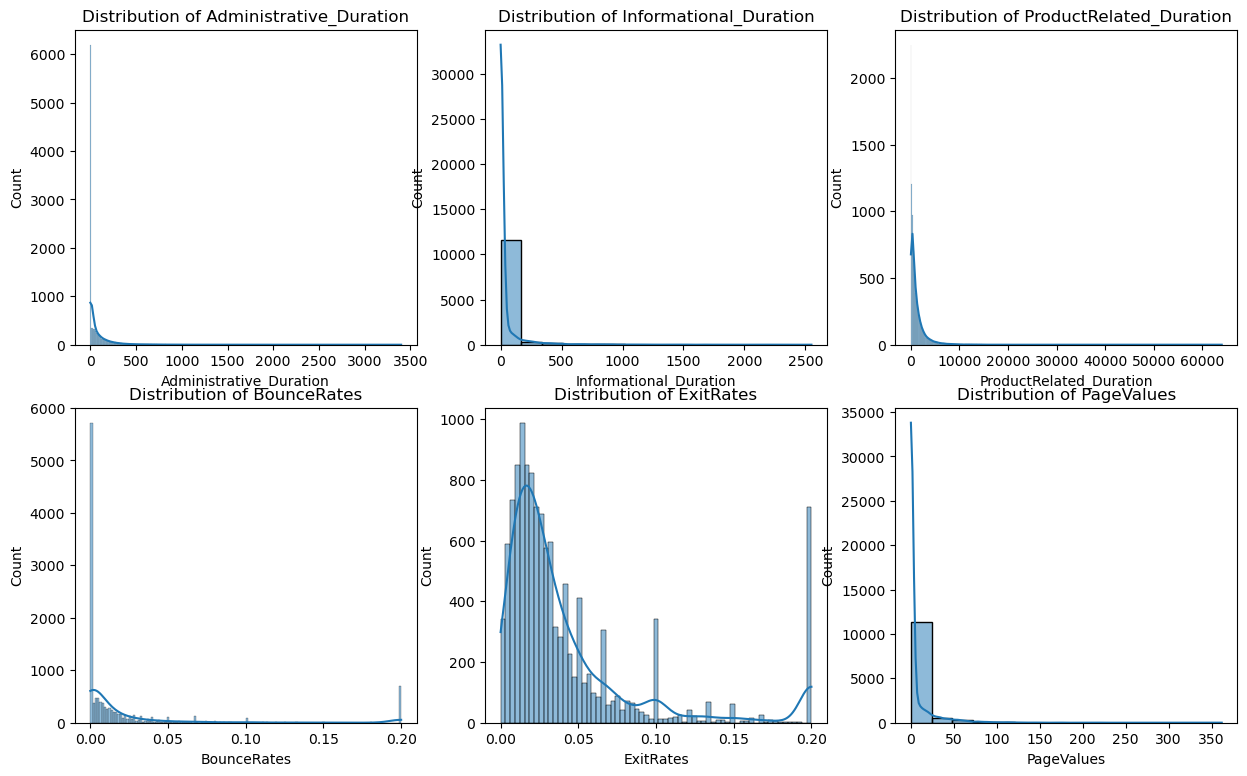

In [ ]:
# Numerical fearures
numericalColumns = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues'
]
plt.figure(figsize=(15, 9))
for i, col in enumerate(numericalColumns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout
plt.show()

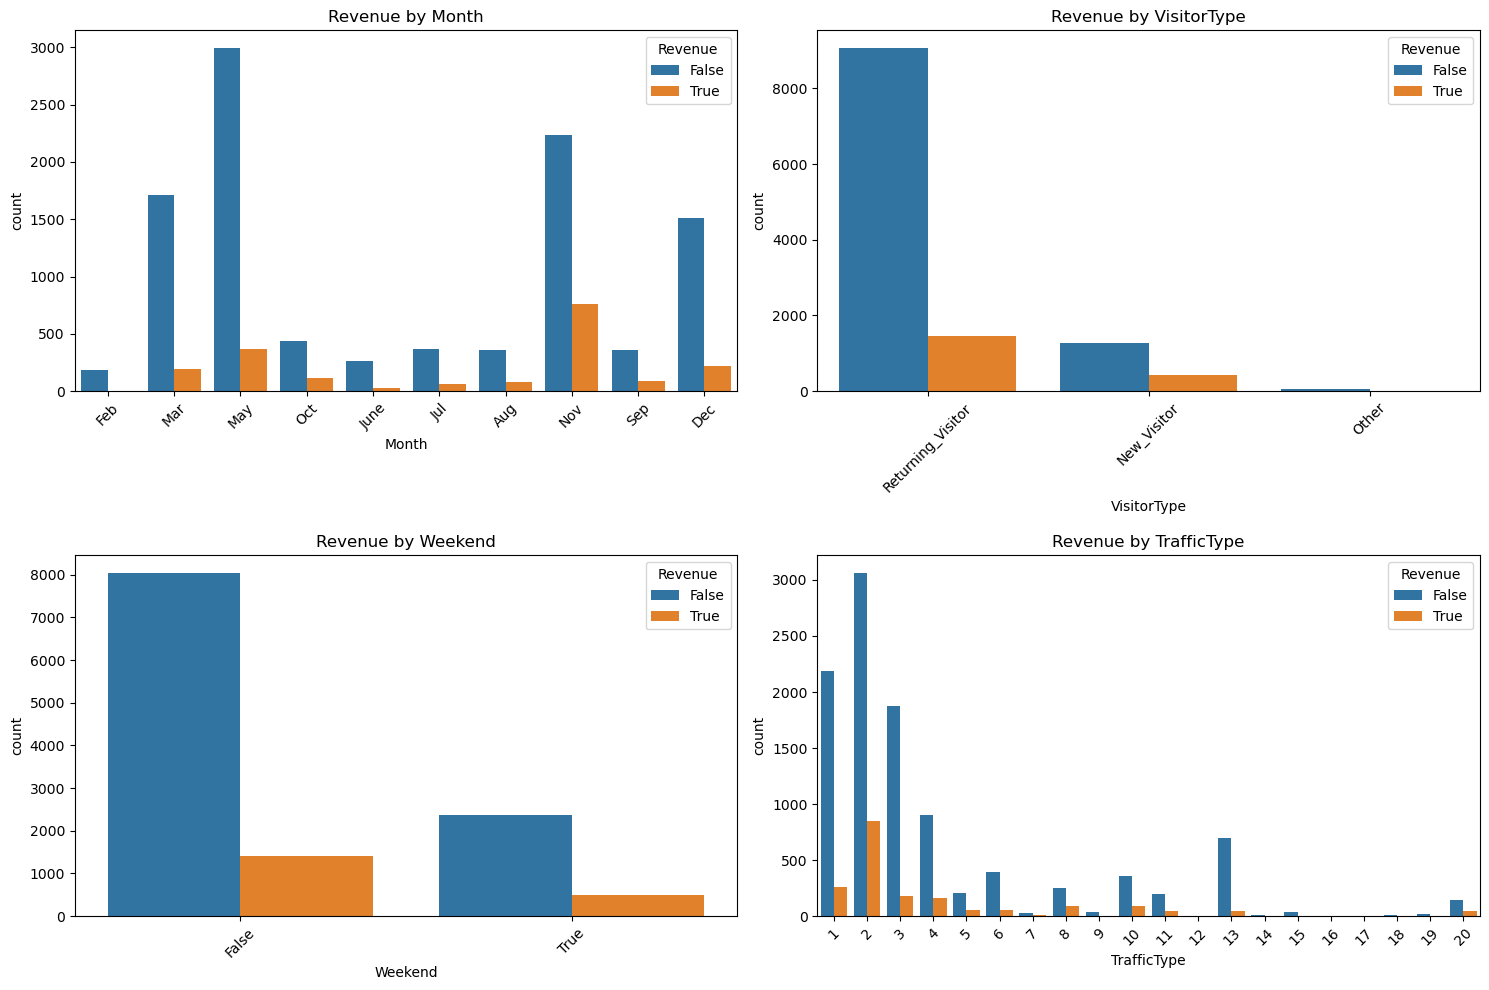

In [ ]:
# Revenue distribution
categoricalColumns = [
    'Month',
    'VisitorType',
    'Weekend',
    'TrafficType'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categoricalColumns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(f'Revenue by {col}')
    plt.xticks(rotation=45)
plt.tight_layout(h_pad=1.5)
plt.show()

In [50]:
# Correlation
corr = df[numericalColumns +['Revenue']].corr()
corr

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
Administrative_Duration,1.000000,0.238031,0.355422,-0.144170,-0.205798,0.067608,0.093587
Informational_Duration,0.238031,1.000000,0.347364,-0.074067,-0.105276,0.030861,0.070345
ProductRelated_Duration,0.355422,0.347364,1.000000,-0.184541,-0.251984,0.052823,0.152373
BounceRates,-0.144170,-0.074067,-0.184541,1.000000,0.913004,-0.119386,-0.150673
ExitRates,-0.205798,-0.105276,-0.251984,0.913004,1.000000,-0.174498,-0.207071
PageValues,0.067608,0.030861,0.052823,-0.119386,-0.174498,1.000000,0.492569
Revenue,0.093587,0.070345,0.152373,-0.150673,-0.207071,0.492569,1.000000


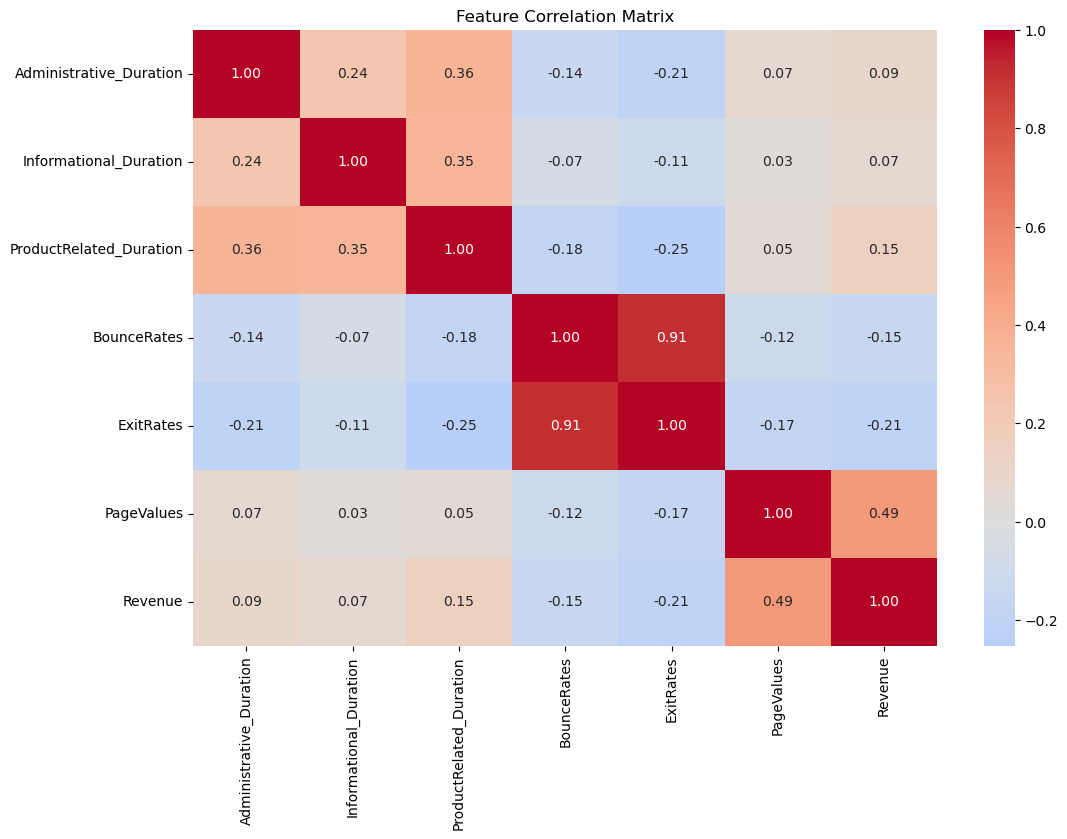

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [58]:
# Feature engineering
df['Total_Duration'] = df['Administrative'] + df['Administrative_Duration'] + df['ProductRelated_Duration']
df['PageValue_to_ExitRatio']= np.where(df['ExitRates']>0, df['PageValues']/df['ExitRates'], 0)
df['BounceExit_Interaction'] = df['BounceRates'] * df['ExitRates']

In [59]:
df['Revenue'] = df['Revenue'].astype(int)

In [61]:
# Machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (PowerTransformer, OneHotEncoder, LabelEncoder, StandardScaler)
from sklearn.pipeline import Pipeline

In [62]:
x = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
numericalFeatures = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues',
    'Total_Duration',
    'PageValue_to_ExitRatio',
    'BounceExit_Interaction'
]

categoricalFeatures = [
    'Month',
    'VisitorType',
    'Weekend',
    'TrafficType',
]